<h2>Preprocessing

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train["source"] = "train"
test["source"] = "test"

In [4]:
df = pd.concat([train,test])

In [64]:
df['Vehicle_Damage']=np.where(df['Vehicle_Damage']=='Yes',1,0)
train['Vehicle_Damage']=np.where(train['Vehicle_Damage']=='Yes',1,0)
test['Vehicle_Damage']=np.where(test['Vehicle_Damage']=='Yes',1,0)

C:\Users\partha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df['Gender']=np.where(df['Gender']=='Male',1,0)
train['Gender']=np.where(train['Gender']=='Male',1,0)
test['Gender']=np.where(test['Gender']=='Male',1,0)

C:\Users\partha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['Vehicle_Age'].value_counts()

1    267015
0    219805
2     21326
Name: Vehicle_Age, dtype: int64

In [66]:
df.replace(to_replace='1-2 Year', value= 1 , inplace=True)
df.replace(to_replace='< 1 Year', value= 0 , inplace=True)
df.replace(to_replace='> 2 Years', value= 2 , inplace=True)
train.replace(to_replace='1-2 Year', value= 1 , inplace=True)
train.replace(to_replace='< 1 Year', value= 0 , inplace=True)
train.replace(to_replace='> 2 Years', value= 2 , inplace=True)
test.replace(to_replace='1-2 Year', value= 1 , inplace=True)
test.replace(to_replace='< 1 Year', value= 0 , inplace=True)
test.replace(to_replace='> 2 Years', value= 2 , inplace=True)


C:\Users\partha\anaconda3\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [46]:
pandas_profiling.ProfileReport(df)

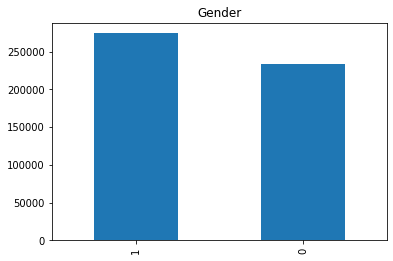

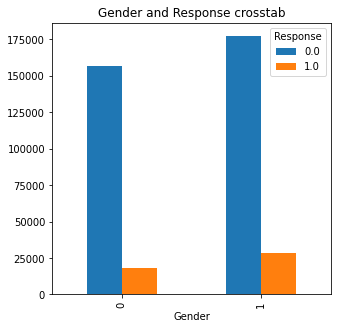

In [13]:
df["Gender"].value_counts().plot.bar()
plt.title("Gender")


DL = pd.crosstab(df['Gender'], df['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Gender and Response crosstab")
plt.show()

<AxesSubplot:>

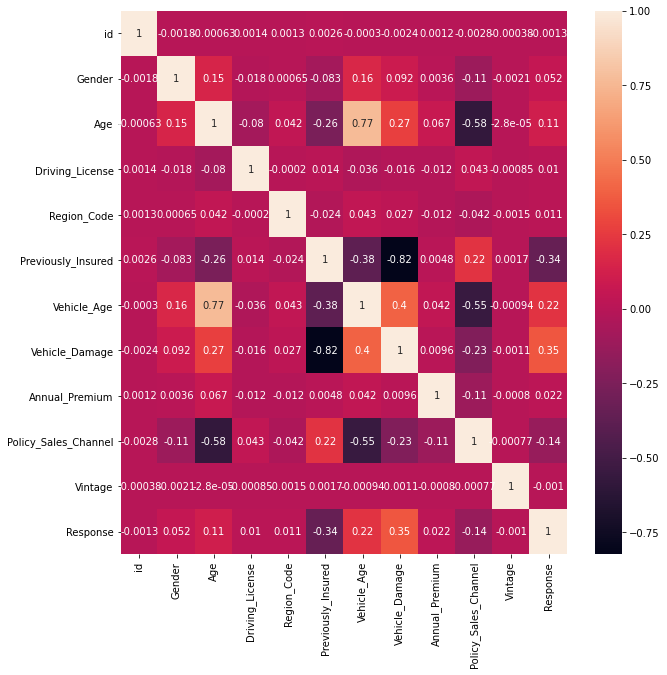

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [67]:
df=df.drop_duplicates(subset=[ele for ele in list(df.columns) if ele not in ['id']])
train=train.drop_duplicates(subset=[ele for ele in list(train.columns) if ele not in ['id']])

In [68]:
df['Vintage'] = df['Vintage']/365
train['Vintage'] = train['Vintage']/365
test['Vintage'] = test['Vintage']/365

C:\Users\partha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df["DL_PI"]    = df.groupby(["Driving_License", "Previously_Insured"]).ngroup().astype('int')
train["DL_PI"]    = train.groupby(["Driving_License", "Previously_Insured"]).ngroup().astype('int')
test["DL_PI"]    = test.groupby(["Driving_License", "Previously_Insured"]).ngroup().astype('int')

C:\Users\partha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df["region_per_premium"] = df.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
df["region_sum_premium"] = df.groupby(["Region_Code"])["Annual_Premium"].transform('sum')

train["region_per_premium"] = train.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
train["region_sum_premium"] = train.groupby(["Region_Code"])["Annual_Premium"].transform('sum')

test["region_per_premium"] = test.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
test["region_sum_premium"] = test.groupby(["Region_Code"])["Annual_Premium"].transform('sum')

C:\Users\partha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\partha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
'''train_preprocessed = df[df["source"]=="train"]
test_preprocessed = df[df["source"]=="test"]'''

In [60]:
'''del train_preprocessed["source"]
del test_preprocessed["source"]'''

In [73]:
train_preprocessed = train
test_preprocessed = test

In [74]:
train_preprocessed.to_csv("train_crosssell_Preprocessed.csv", index = False)
test_preprocessed.to_csv("test_crosssell_Preprocessed.csv", index = False)

In [2]:
######################################################################################################

In [5]:
fn = pd.read_csv("final result.csv")

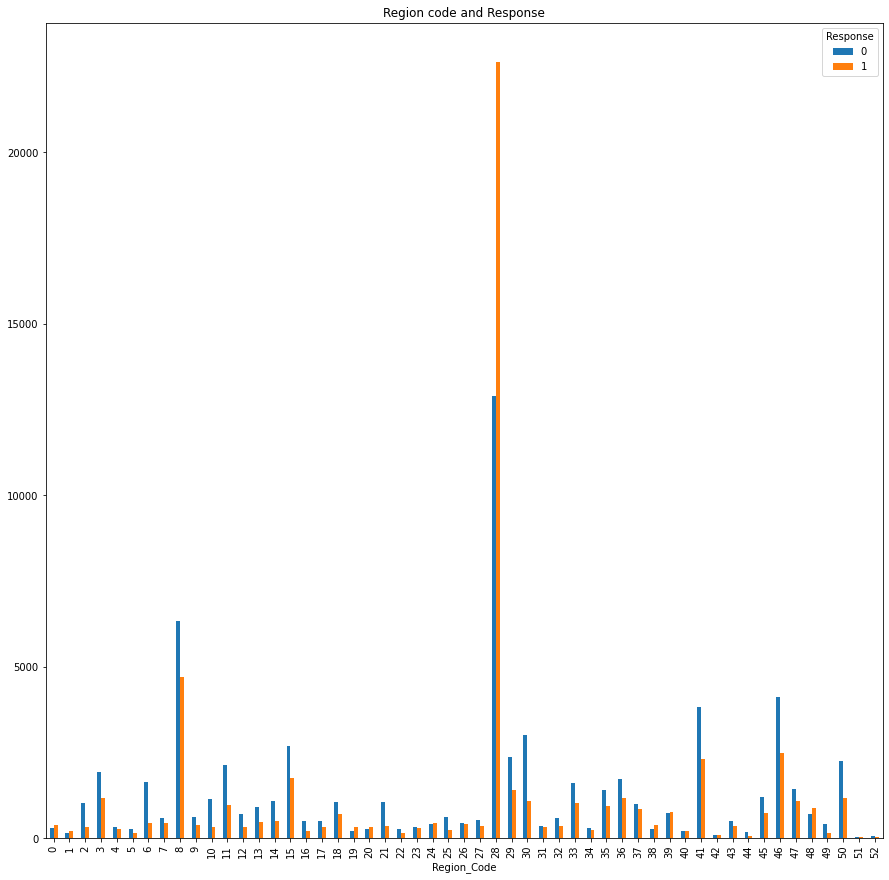

In [24]:
DL = pd.crosstab(index=[fn['Region_Code']], columns=fn['Response'])
DL.plot(kind="bar", figsize=(15,15))
plt.title("Region code and Response")
plt.show()

In [10]:
fn

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1           11                   1   
1       381111    Male   40                1           28                   0   
2       381112    Male   47                1           28                   0   
3       381113    Male   24                1           27                   1   
4       381114    Male   27                1           28                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1           37                   1   
127033  508143  Female   38                1           28                   0   
127034  508144    Male   21                1           46                   1   
127035  508145    Male   71                1           28                   1   
127036  508146    Male   41                1           29                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0         < 1 Year             No           35786                   152   
1         1-2 Year            Yes           33762                     7   
2         1-2 Year            Yes           40050                   124   
3         < 1 Year            Yes           37356                   152   
4         < 1 Year             No           59097                   152   
...            ...            ...             ...                   ...   
127032    < 1 Year             No           30867                   152   
127033    1-2 Year            Yes           28700                   122   
127034    < 1 Year             No           29802                   152   
127035    1-2 Year             No           62875                    26   
127036    1-2 Year             No           27927                   124   

        Vintage  Response  
0            53         0  
1           111         1  
2           199         1  
3           187         0  
4           297         0  
...         ...       ...  
127032       56         0  
127033      165         1  
127034       74         0  
127035      265         0  
127036      231         0  

[127037 rows x 12 columns]